# DATA UNDERSTANDING

# DATA INSPECTION

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv('global_cancer_patients_2015_2024.csv')
print(df.head())

  Patient_ID   Age  Gender Country_Region    Year  Genetic_Risk  \
0  PT0000000  71.0    Male             UK  2021.0           6.4   
1  PT0000001  34.0    Male          China  2021.0           1.3   
2  PT0000002  80.0    Male       Pakistan  2023.0           7.4   
3  PT0000003  40.0    Male             UK  2015.0           1.7   
4  PT0000004  43.0  Female         Brazil  2017.0           5.1   

   Air_Pollution  Alcohol_Use  Smoking  Obesity_Level Cancer_Type  \
0            2.8          9.5      0.9            8.7        Lung   
1            4.5          3.7      3.9            6.3    Leukemia   
2            7.9          2.4      4.7            0.1      Breast   
3            2.9          4.8      3.5            2.7       Colon   
4            2.8          2.3      6.7            0.5        Skin   

  Cancer_Stage  Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0    Stage III            62913.44             5.9                   4.92  
1      Stage 0            1257

In [36]:
print(df.columns)

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    49993 non-null  float64
 2   Gender                 49993 non-null  object 
 3   Country_Region         49996 non-null  object 
 4   Year                   49992 non-null  float64
 5   Genetic_Risk           49993 non-null  float64
 6   Air_Pollution          49991 non-null  float64
 7   Alcohol_Use            49992 non-null  float64
 8   Smoking                49990 non-null  float64
 9   Obesity_Level          49994 non-null  float64
 10  Cancer_Type            49993 non-null  object 
 11  Cancer_Stage           49987 non-null  object 
 12  Treatment_Cost_USD     49994 non-null  float64
 13  Survival_Years         49996 non-null  float64
 14  Target_Severity_Score  49996 non-null  float64
dtypes:

In [38]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,49993.000000,49992.000000,49993.000000,49991.000000,49992.000000,49990.000000,49994.000000,49994.000000,49996.000000,49996.000000
mean,54.420839,2019.480777,5.001696,5.009876,5.010816,4.989836,4.990985,52467.106608,5.006499,4.951233
std,20.224295,2.871424,2.885751,2.888493,2.888737,2.881588,2.894543,27363.570020,2.883299,1.199716
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.545000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76231.465000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [39]:
# to find the missing values
df.isnull().sum()

Patient_ID                0
Age                       7
Gender                    7
Country_Region            4
Year                      8
Genetic_Risk              7
Air_Pollution             9
Alcohol_Use               8
Smoking                  10
Obesity_Level             6
Cancer_Type               7
Cancer_Stage             13
Treatment_Cost_USD        6
Survival_Years            4
Target_Severity_Score     4
dtype: int64

# DATA CLEANING

In [40]:
#filling the missing values according to the data it represents
#mean() method is used for all the numeriacal columns to maintain distribution of data
#Genetic_Risk is filled with mean()
mean_cols=['Genetic_Risk','Air_Pollution','Alcohol_Use','Smoking','Obesity_Level']

for col in mean_cols:
    df[col]=df[col].fillna(df[col].mean())

In [41]:
#median() method is used for all the continuous numerical data 
#Age is filled with median
median_cols=['Age','Treatment_Cost_USD','Survival_Years','Target_Severity_Score']
for col in median_cols:
    df[col]=df[col].fillna(df[col].median())

In [42]:
# mode() for categorial data and discrete numericals
mode_cols = ['Gender', 'Country_Region', 'Year', 'Cancer_Type', 'Cancer_Stage']

for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  float64
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  float64
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [44]:
# no missing values 
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [45]:
# # astype() is used to change the datatype
# df['Patient_ID'] = df['Patient_ID'].astype(str)

In [46]:
#check duplicates and drop the duplicates
df['Patient_ID'].duplicated().sum()  #for finding the duplicates and total no of duplicates in data
#there are no duplicates Patient_ID

0

In [47]:
df=df.drop_duplicates(subset='Patient_ID')  #dropping duplicates if there are any

# OUTLIER HANDLING

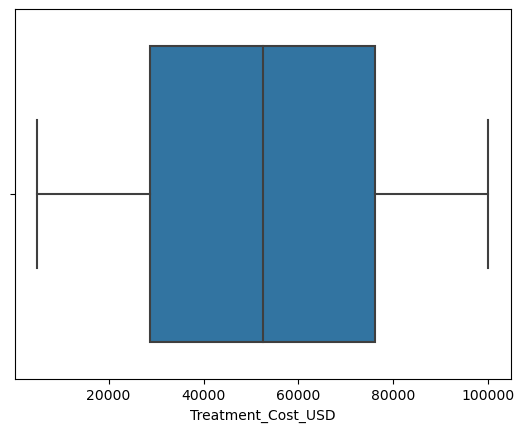

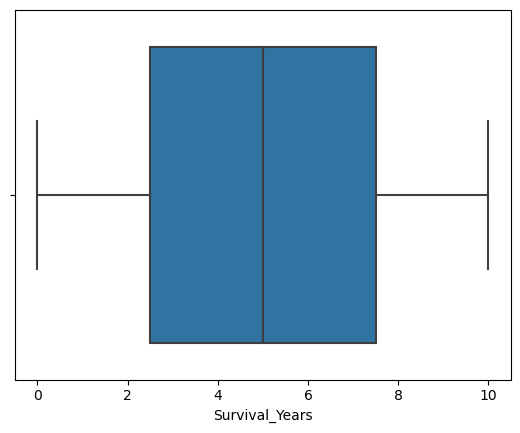

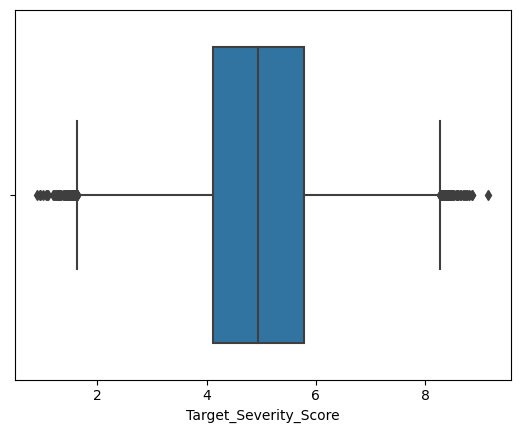

In [107]:
#outlier handling
cols=['Treatment_Cost_USD', 'Survival_Years', 
'Target_Severity_Score']

for col in cols:
    sns.boxplot(x=df[col])
    plt.show()
    
    
# In 'Treatment_Cost_USD', 'Survival_Years' there are no outliers as there are dots in the left and right side of the wiskers
# in 'Target_Severity_Score' there are outliers 

In [48]:
Q1 = df['Target_Severity_Score'].quantile(0.25)
Q3 = df['Target_Severity_Score'].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5 * IQR
upper = Q1 + 1.5 * IQR
df=df[(df['Target_Severity_Score']>=lower)&
     (df['Target_Severity_Score']<= upper)]
print(df.head())

  Patient_ID   Age  Gender Country_Region    Year  Genetic_Risk  \
0  PT0000000  71.0    Male             UK  2021.0           6.4   
1  PT0000001  34.0    Male          China  2021.0           1.3   
2  PT0000002  80.0    Male       Pakistan  2023.0           7.4   
3  PT0000003  40.0    Male             UK  2015.0           1.7   
4  PT0000004  43.0  Female         Brazil  2017.0           5.1   

   Air_Pollution  Alcohol_Use  Smoking  Obesity_Level Cancer_Type  \
0            2.8          9.5      0.9            8.7        Lung   
1            4.5          3.7      3.9            6.3    Leukemia   
2            7.9          2.4      4.7            0.1      Breast   
3            2.9          4.8      3.5            2.7       Colon   
4            2.8          2.3      6.7            0.5        Skin   

  Cancer_Stage  Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0    Stage III            62913.44             5.9                   4.92  
1      Stage 0            1257

# Encoding Categorical Variables 

In [49]:
df['Cancer_Stage'].dtype  #find the dtype of 'Cancer_Stage'

dtype('O')

In [50]:
df['Cancer_Stage'].unique()  #find the unique values from 'Cancer_Stage'

array(['Stage III', 'Stage 0', 'Stage II', 'Stage I', 'Stage IV'],
      dtype=object)

In [51]:
#Integer Encoding 
# 'Cancer_Stage' is ordinal data, Integer encoding preserves the order of the column
df['Cancer_Stage'] = df['Cancer_Stage'].str.strip()
stage_map={'Stage 0':0,'Stage I':1,'Stage II':2,'Stage III':3,'Stage IV':4 }
df['Cancer_Stage']=df['Cancer_Stage'].map(stage_map)
df['Cancer_Stage'] = df['Cancer_Stage'].fillna(df['Cancer_Stage'].mode()[0]).astype(int)
print(stage_map)


{'Stage 0': 0, 'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4}


In [52]:
#onehot encoding 
#'Gender','Cancer_Type' is nominal data with no order, so one hot encoding is used
df = pd.get_dummies(df, columns=['Gender','Cancer_Type'], drop_first=True)
df

,Patient_ID,Age,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Stage,...,Target_Severity_Score,Gender_Male,Gender_Other,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,PT0000000,71.0,UK,2021.0,6.4,2.8,9.5,0.9,8.7,3,...,4.92,True,False,False,False,False,False,True,False,False
1,PT0000001,34.0,China,2021.0,1.3,4.5,3.7,3.9,6.3,0,...,4.65,True,False,False,False,True,False,False,False,False
2,PT0000002,80.0,Pakistan,2023.0,7.4,7.9,2.4,4.7,0.1,2,...,5.84,True,False,False,False,False,False,False,False,False
3,PT0000003,40.0,UK,2015.0,1.7,2.9,4.8,3.5,2.7,1,...,3.12,True,False,False,True,False,False,False,False,False
4,PT0000004,43.0,Brazil,2017.0,5.1,2.8,2.3,6.7,0.5,3,...,3.62,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80.0,Pakistan,2023.0,2.3,7.5,2.8,3.8,2.9,0,...,3.63,True,False,False,False,True,False,False,False,False
49996,PT0049996,40.0,USA,2018.0,6.4,3.5,2.9,9.0,9.8,1,...,6.03,False,False,False,True,False,False,False,False,False
49997,PT0049997,74.0,Pakistan,2015.0,6.2,1.6,8.7,4.7,4.0,0,...,6.02,True,False,False,False,False,False,False,False,False
49998,PT0049998,21.0,Brazil,2018.0,4.0,6.5,7.6,8.6,8.1,4,...,6.54,True,False,False,False,False,True,False,False,False


In [24]:
df['Cancer_Stage'].dtype

dtype('int32')

# Feature Scaling

In [25]:
# Feature scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler

std_scaler=StandardScaler()
minmax_scaler=MinMaxScaler()
df[['Age','Genetic_Risk']]=std_scaler.fit_transform(df[['Age','Genetic_Risk']])
df[['Treatment_Cost_USD']]=minmax_scaler.fit_transform(df[['Treatment_Cost_USD']])

# Univariate EDA 

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


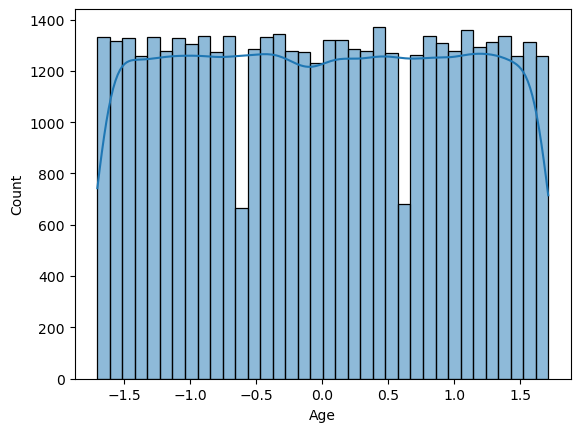

In [29]:
#Univariate EDA
#Histogram
sns.histplot(df['Age'],kde=True)
plt.show()


C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


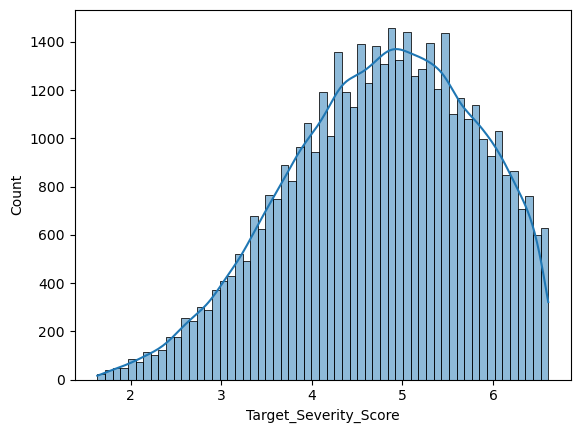

In [31]:
# for 'Target_Severity_Score

sns.histplot(df['Target_Severity_Score'],kde=True)
plt.show()

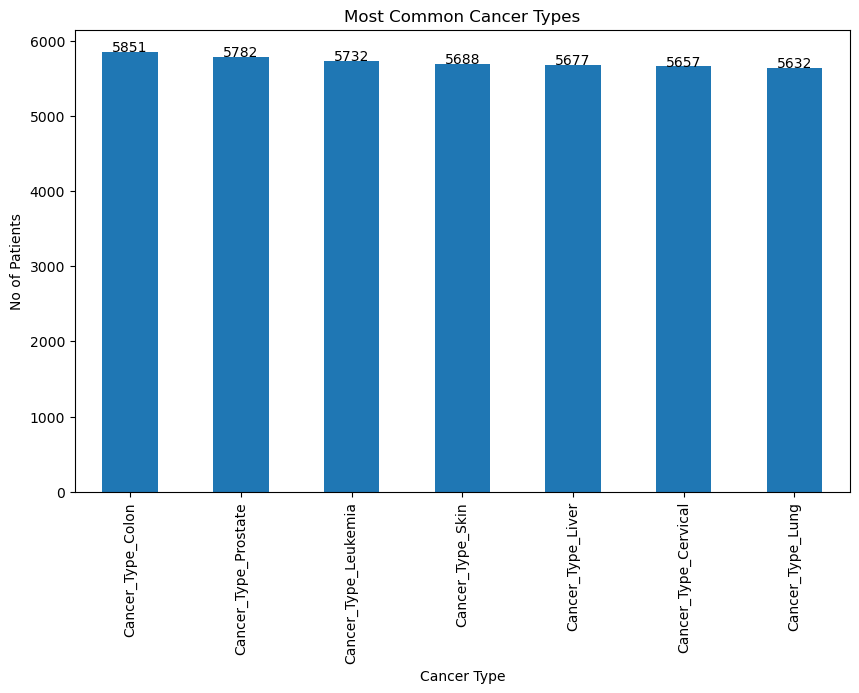

In [62]:
#which cancer_type is most common
#after one hot encoding of 'Cancer_Type' column , it is converted into multiple binary columns


cancer_cols = [col for col in df.columns if col.startswith('Cancer_Type_')]

counts = df[cancer_cols].sum().sort_values(ascending=False)

ax = counts.plot(kind='bar', figsize=(10,6))

for i, v in enumerate(counts):
    ax.text(i, v + 5, str(int(v)), ha='center', fontsize=10)

plt.title('Most Common Cancer Types')
plt.ylabel('No of Patients')
plt.xlabel('Cancer Type')
plt.show()


#here 'Cancer_Type_Colon' is the most common 'Cancer_Type'

# Bivariate and Multivariate EDA

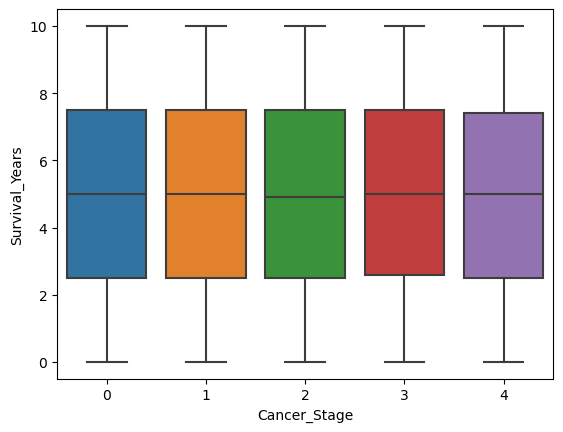

In [65]:
#'Cancer_Stage' VS 'Survival_Years'
sns.boxplot(x='Cancer_Stage',y='Survival_Years',data=df)
plt.show()


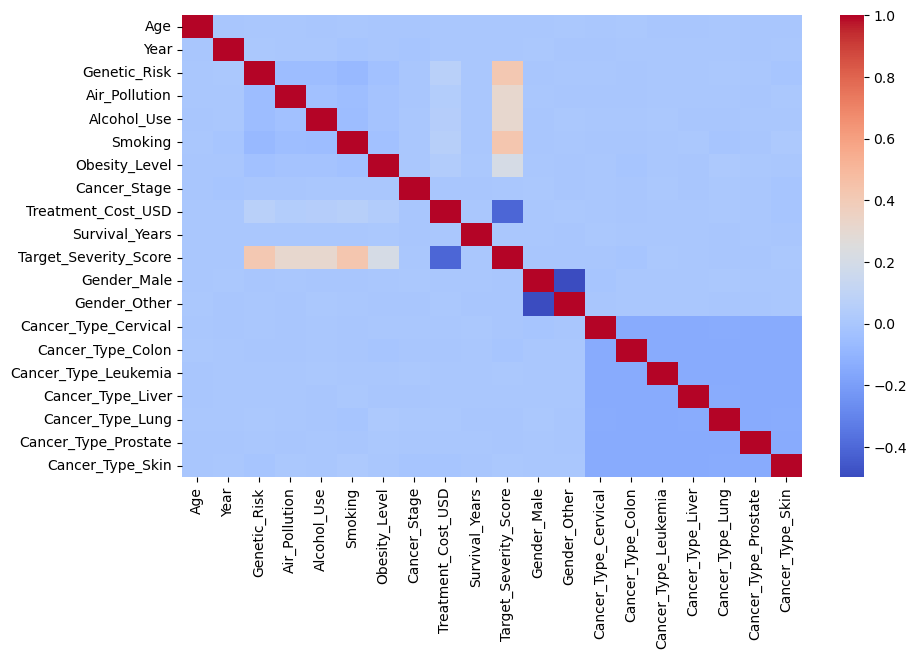

In [68]:
#correlation heatmap
plt.figure(figsize=(10,6)) 
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')   #heat maps works with numerical features only
plt.show()

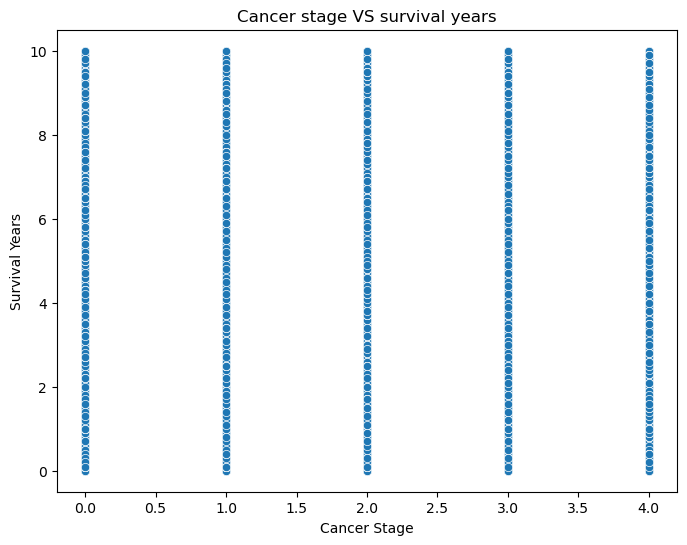

In [74]:
#scatterplot
plt.figure(figsize=(8,6))

sns.scatterplot(x='Cancer_Stage',y='Survival_Years',data=df)
plt.title('Cancer stage VS survival years')
plt.xlabel('Cancer Stage')
plt.ylabel('Survival Years')
plt.show()

# Insights & Conclusion 